In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
np.random.seed(0)

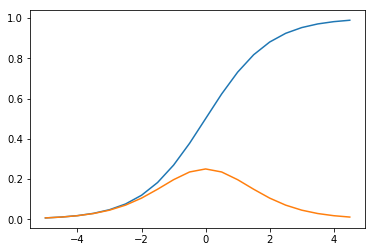

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidPrime(x):
    return sigmoid(x) * (1-sigmoid(x))

t = np.arange(-5., 5., 0.5)
plt.plot(t, sigmoid(t))
plt.plot(t, sigmoidPrime(t))
plt.show()

In [4]:
def converter(x):
    if x == 2:
        return [1, 0]
    else:
        return [0, 1]
    
vconverter = np.vectorize(converter)

data = np.genfromtxt("breast-cancer.data", delimiter=",", missing_values="?", filling_values=1.)

dataX = data[:, 1:-1]
pre_dataY = data[:, -1]
dataY = np.zeros((pre_dataY.size, 2))

for i in range(len(pre_dataY)):
    if pre_dataY[i] == 2:
        dataY[i][0] = 1
    else:
        dataY[i][1] = 1

In [5]:
permutation = np.random.permutation(dataX.shape[0])
dataX = dataX[permutation]
dataY = dataY[permutation]

In [24]:
nIn = 9
nHidden = 25
nOut = 2
alpha = 0.01
nEpochs = 800
testSplit = 0.15

In [20]:
def nn_forward(X, W1, W2):
    x = X.reshape(-1, nIn)
    
    layer2 = np.dot(x, W1)
    layer2 = sigmoid(layer2)
    
    out = np.dot(layer2, W2)
    out = sigmoid(out)
    
    return out

In [8]:
def train(X, Y, W1, W2):
    x = X.reshape(-1, nIn)
    Y = Y.reshape(-1, nOut)
    
    layer2 = np.dot(x, W1)
    a_layer2 = sigmoid(layer2)
    
    out = np.dot(a_layer2, W2)
    a_out = sigmoid(out)
    
    if np.argmax(a_out) == np.argmax(Y):
        accuracy = 1
    else:
        accuracy = 0
    
    loss = np.sum(0.5 * (Y - a_out) ** 2)
    
    delta_loss = (Y - a_out) * -sigmoidPrime(out)
    delta_W2 = np.dot(layer2.T, delta_loss)
    
    delta_loss = np.dot(delta_loss, W2.T) * sigmoidPrime(layer2)
    delta_W1 = np.dot(X.T.reshape(nIn, 1), delta_loss)
    
    W2 = W2 - alpha * delta_W2
    W1 = W1 - alpha * delta_W1
    
    return W1, W2, loss, accuracy

In [25]:
losses = []
W1 = np.random.rand(nIn, nHidden) * 0.5
W2 = np.random.rand(nHidden, nOut) * 0.5

Epoch 0 Loss: 0.5298472755331531
	Accuracy: 0.012907563025210084
Epoch 50 Loss: 0.3313208782177386
	Accuracy: 0.6571428571428571
Epoch 100 Loss: 0.2641511642383704
	Accuracy: 0.4150924369747899
Epoch 150 Loss: 0.2813348789620822
	Accuracy: 0.4266218487394958
Epoch 200 Loss: 0.2835899242457942
	Accuracy: 0.4459495798319328
Epoch 250 Loss: 0.2844622437260139
	Accuracy: 0.4517310924369748


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 300 Loss: 0.2849161484516123
	Accuracy: 0.456
Epoch 350 Loss: 0.285448239747488
	Accuracy: 0.4611764705882353
Epoch 400 Loss: 0.28645851711485887
	Accuracy: 0.46073949579831935
Epoch 450 Loss: 0.2865946982938425
	Accuracy: 0.46205042016806724
Epoch 500 Loss: 0.28711022669724395
	Accuracy: 0.4653109243697479
Epoch 550 Loss: 0.28653048417272464
	Accuracy: 0.4698823529411765
Epoch 600 Loss: 0.621376055189816
	Accuracy: 0.5494117647058824
Epoch 650 Loss: 0.4508293908045732
	Accuracy: 0.9009411764705882
Epoch 700 Loss: 0.13082073724203336
	Accuracy: 0.9585210084033613
Epoch 750 Loss: 0.16168901121112988
	Accuracy: 0.9611428571428572


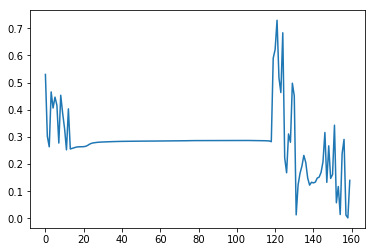

In [26]:
correct = 0
for j in range(nEpochs):
    nTraining = dataX.shape[0]-int(testSplit * len(dataX))
    for i in range(nTraining):
        W1, W2, loss, c = train(dataX[i], dataY[i], W1, W2)
        correct += c
    if j % 50 == 0:
        accuracy = correct / (50 * nTraining)
        print("Epoch {} Loss: {}\n\tAccuracy: {}".format(j, loss, accuracy))
        correct = 0
        total = 0
    if j % 5 == 0:
        losses.append(loss)

plt.plot(losses)
plt.show()

In [27]:
correct = 0
total = int(testSplit * len(dataX))

for i in range(total):
    index = len(dataX) - int(testSplit * len(dataX)) + i
    pred = np.argmax(nn_forward(dataX[index], W1, W2))+1
    actual = np.argmax(dataY[index])+1
    
    #print("Prediction: Type {}".format(pred))
    #print("Actual: Type {}\n".format(actual))
    
    if pred == actual:
        correct += 1
    
print("Accuracy: {}%".format(correct/total))

Accuracy: 0.9519230769230769%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
